 <h1><center>Ad Click Prediction</center></h1>
 
 # Data Science Project - [Kaggle](https://www.kaggle.com/fayomi/advertising)
 
 ### AUTHOR - Santosh Konchada
 
 ###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Introduction

The goal of the project is to __Predict who is likely going to click on the Ad__ on a website based on the features of a user. Following are the features involved in this dataset which is obtained from Kaggle.

|           Feature               |                  Description                           |
|---------------------------------|--------------------------------------------------------|
|1. __Daily Time Spent on a Site__   | Time spent by the user on a site in minutes.        |
|2. __Age__                          | Customer's age in terms of years.                   |
|3. __Area Income__                  | Average income of geographical area of consumer.    |
|4. __Daily Internet Usage__         | Avgerage minutes in a day consumer is on the internet.|
|5. __Ad Topic Line__                | Headline of the advertisement.                      | 
|6. __City__                         | City of the consumer.                               |
|7. __Male__                         | Whether or not a consumer was male.                 |
|8. __Country__                      | Country of the consumer.                            |
|9. __Timestamp__                    | Time at which user clicked on an Ad or the closed window.|
|10. __Clicked on Ad__               | 0 or 1 is indicated clicking on an Ad.              |



This notebook will contain only the exploratory data analysis part related to this project. 

Steps involved in this Notebook

- [Getting to know about the Data](#Examine-the-data)
- [Extract New features](#Extracting-Datetime-Variables)
- [Check distribution of target variable](#Visualize-Target-Variable )
- [Understand Relationship between variables](#Distribution-and-Relationship-Between-Variables)
- [Identify Potential Outliers](#Identifying-Potential-Outliers-using-IQR)

__Note:__ The Data obtained is cleaned.

# Load Libraries

In [1]:
import numpy as np                    # Linear Algebra
import pandas as pd                   # Data processing 
import matplotlib.pyplot as plt       # Visualizations
import seaborn as sns                 # Visualizations
import gc                             # Collectc garbage (Memory allocation)
import warnings                       # Hide warning messages
warnings.filterwarnings("ignore")
%matplotlib inline                    

# Load Data 

In [2]:
# Reading the file 
df = pd.read_csv('advertising.csv') 

# Examine the data

In [3]:
df.head(10) # Checking the 1st 10 rows of the data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


# Data type and length of the variables

In [4]:
df.info() # gives the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# Duplicates Checkup

In [5]:
df.duplicated().sum() # displays duplicate records

0

# Numerical and Categorical Variables Identification

In [6]:
df.columns # displays column names

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
df.select_dtypes(include = ['object']).columns # Displays categorical variables which are detected by python 

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [8]:
# Assigning columns as numerical variables
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [9]:
# Assigning columns as categorical variables
Categorical_cols = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

# Summarizing Numerical Variables

In [10]:
df[numeric_cols].describe()
# Decribe method is used to give statistical information on the numerical columns

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


As the __mean__ and __median__(50% percentile) are very similar to each other which indicates that our data is not skewed and we do not require any data transformations.We shall confirm this by visualizing as well.

# Summarizing Categorical Variables

In [11]:
df[Categorical_cols].describe(include = ['O'])
# Decribe method is used to give statistical information on the categorical columns

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Sharable dedicated Graphic Interface,Lisamouth,Czech Republic
freq,1,3,9


As we have many different cities (__Unique__) and also not many people belonging to a same city(__freq__). So, it probably means that this feature is having no or very less predictive power. However we have less diversity with country feature so we have to further investigate it.

### Investing Country Variable

In [12]:
pd.crosstab(df['Country'], df['Clicked on Ad']).sort_values(1,0, ascending = False).head(10)

Clicked on Ad,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


In [13]:
pd.crosstab(index=df['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


It seems that users are from all over the world with maximum from france and czech republic with a count of 9 each.

# Check for Missing Values

In [14]:
df.isnull().sum() # Number of missing values in each column

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# Extracting Datetime Variables

Utilizing timestamp feature to better understand the pattern when a user is clicking on a ad.

In [15]:
# Extract datetime variables using timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp']) 
# Converting timestamp column into datatime object in order to extract new features
df['Month'] = df['Timestamp'].dt.month 
# Creates a new column called Month
df['Day'] = df['Timestamp'].dt.day     
# Creates a new column called Day
df['Hour'] = df['Timestamp'].dt.hour   
# Creates a new column called Hour
df["Weekday"] = df['Timestamp'].dt.dayofweek 
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
df = df.drop(['Timestamp'], axis=1) # deleting timestamp

In [16]:
df.head() # verifying if the variables are added to our main data frame

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


# Visualize Target Variable 

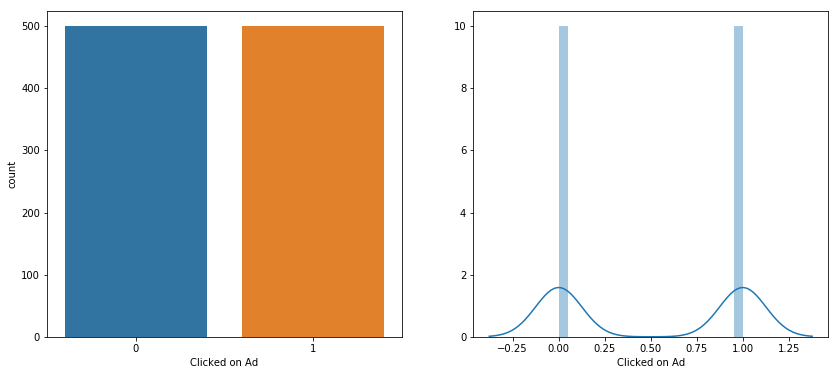

In [17]:
# Visualizing target variable Clicked on Ad
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'Clicked on Ad', data = df)
plt.subplot(1,2,2)
sns.distplot(df["Clicked on Ad"], bins = 20)
plt.show()

So from the plot we can see that the number of users who click on a ad and who do not are equal in numbers i.e 500,  that makes it very interesting.

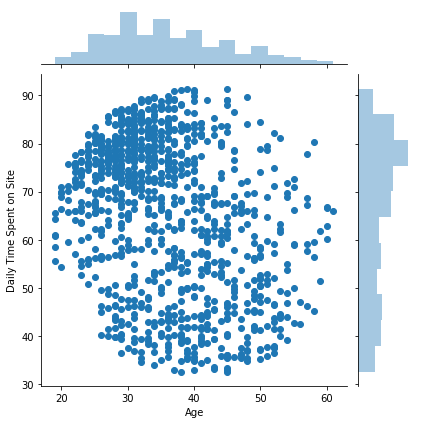

In [18]:
# Jointplot of daily time spent on site and age
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = df) 

We can see that more people aged between 30 to 40 are spending more time on site daily.

# Distribution and Relationship Between Variables 

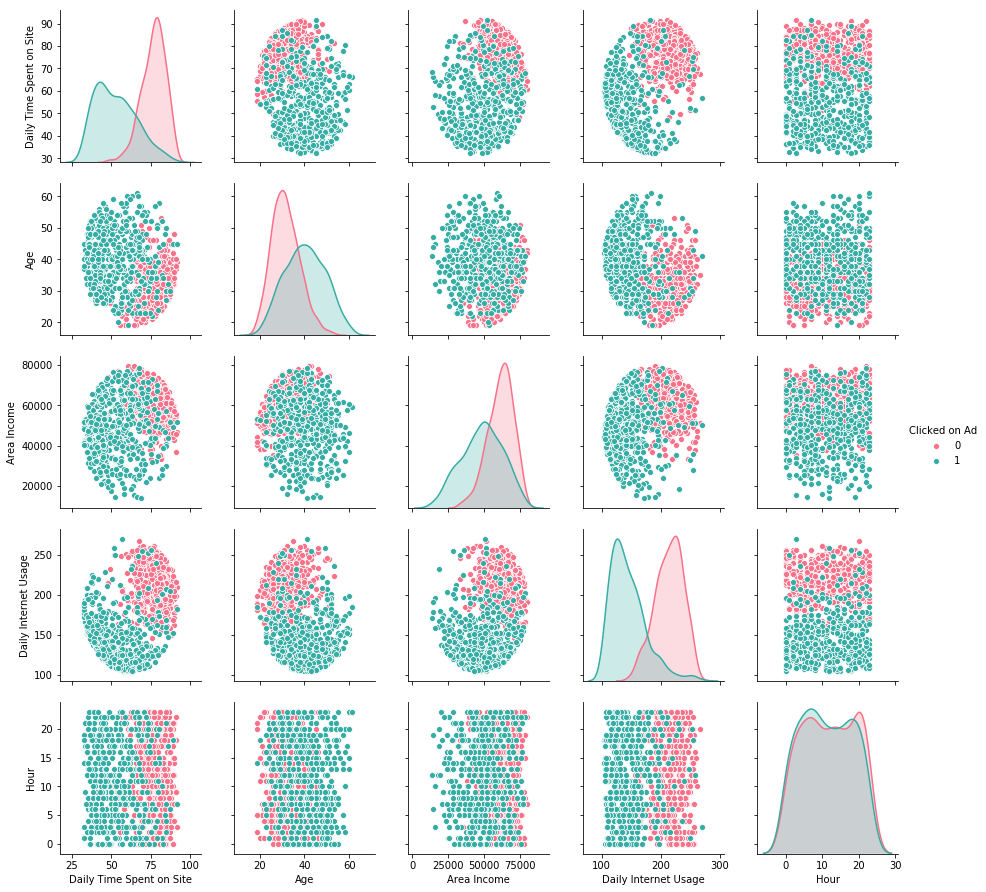

In [19]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(df, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour'], palette = 'husl')

Pairplot represents the relationship between our target feature/variable and explanatory variables. It provides the possible direction of the relationship between the variables. We can see that people who spend less time on site and have less income and are aged more relatively are tend to click on ad. 

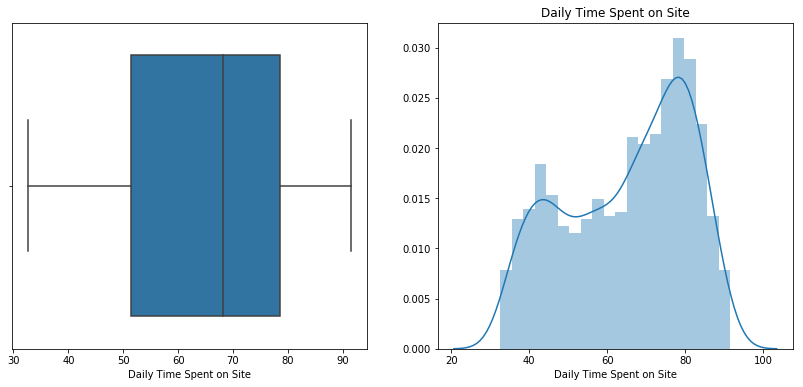

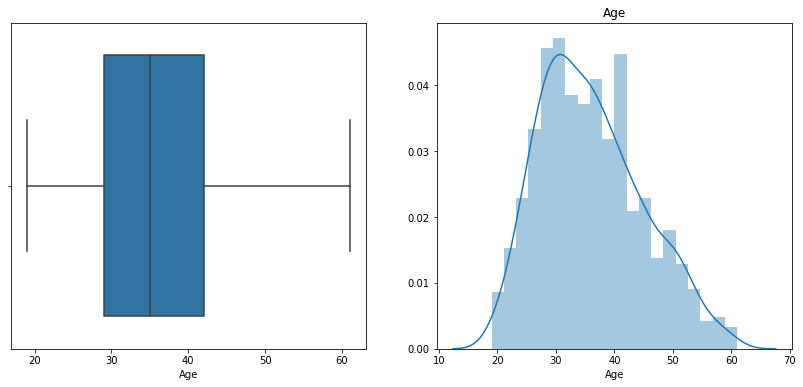

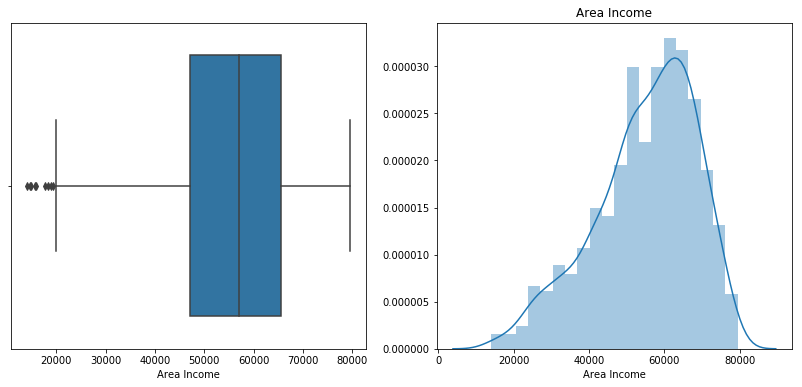

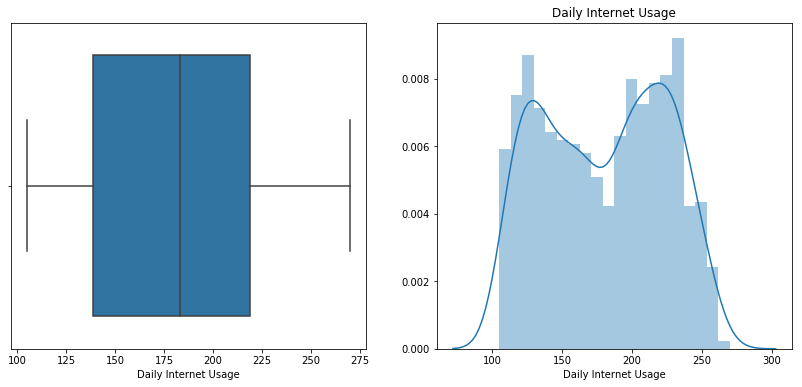

In [20]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df[i])
    plt.subplot(1,2,2)
    sns.distplot(df[i],bins= 20)    
    plt.title(i)    
    plt.show()

We can clearly see that daily interent usage and daily time spent on a site has 2 peaks (Bi-model in statistical terms). It indicates that there are two different groups present in our data. We dont expect the users to be normally distributed as there are people who spend more time on internet/website and people who spend less time. Some regularly use the website and some less often so they are perfectly alright.  

In [21]:
print('oldest person was of:', df['Age'].max(), 'Years')
print('Youngest person was of:', df['Age'].min(), 'Years')
print('Average age was of:', df['Age'].mean(), 'Years')

oldest person was of: 61 Years
Youngest person was of: 19 Years
Average age was of: 36.009 Years


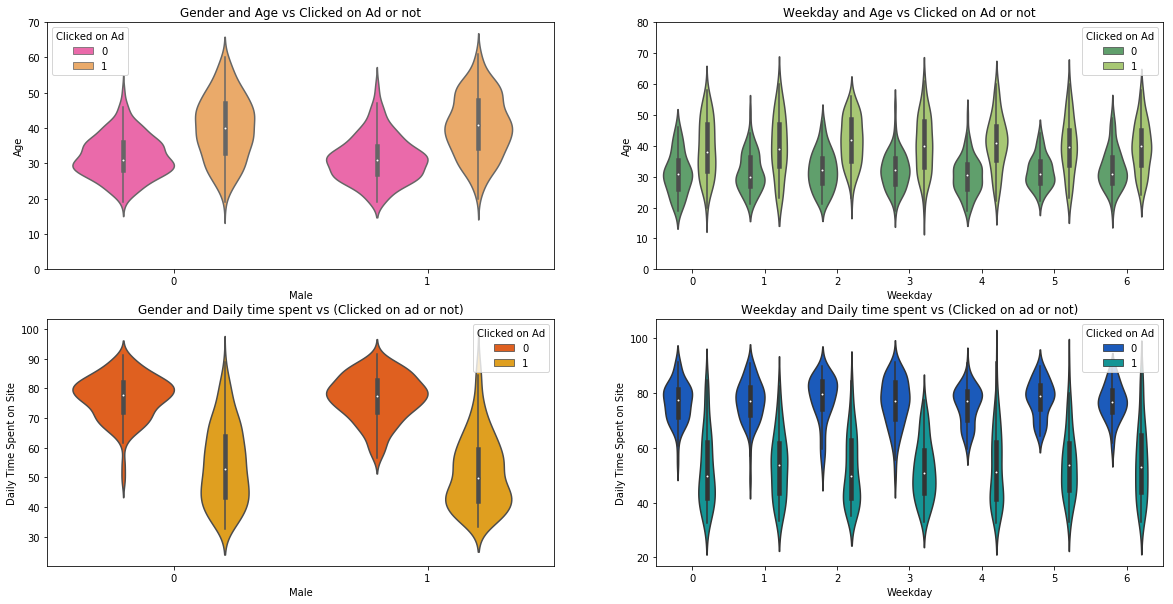

In [22]:
f,ax=plt.subplots(2,2, figsize=(20,10))
sns.violinplot("Male","Age", hue= "Clicked on Ad", data=df,ax=ax[0,0],palette="spring")
ax[0,0].set_title('Gender and Age vs Clicked on Ad or not')
ax[0,0].set_yticks(range(0,80,10))
sns.violinplot("Weekday","Age", hue="Clicked on Ad", data=df,ax=ax[0,1],palette="summer")
ax[0,1].set_title('Weekday and Age vs Clicked on Ad or not')
ax[0,1].set_yticks(range(0,90,10))
sns.violinplot("Male","Daily Time Spent on Site", hue="Clicked on Ad", data=df,ax=ax[1,0],palette="autumn")
ax[1,0].set_title('Gender and Daily time spent vs (Clicked on ad or not)')
#ax[1,0].set_yticks(range(0,120,10))
sns.violinplot("Weekday","Daily Time Spent on Site", hue="Clicked on Ad", data=df,ax=ax[1,1],palette="winter")
ax[1,1].set_title('Weekday and Daily time spent vs (Clicked on ad or not)')
#ax[1,1].set_yticks(range(0,120,10))
plt.show()

# Correlation Between Variables

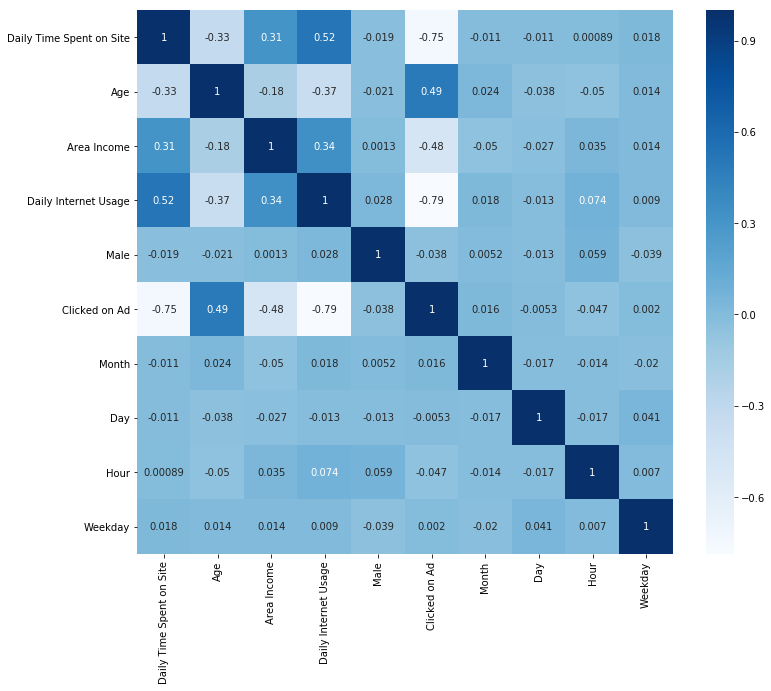

In [23]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='Blues', annot = True) # Degree of relationship i.e correlation using heatmap

Heatmap gives us better understanding of relationship between each feature. Correlation is measured between __-1__ and __1__. Higher the absolute value, higher is the degree of correlation between the variables. We expect daily internet usage and daily time spent on site to be more correlated with our target variable. Also, none of our explantory variables seems to correlate with each other which indicates there is no collinearity in our data. 

# Extracted Features Visualizations

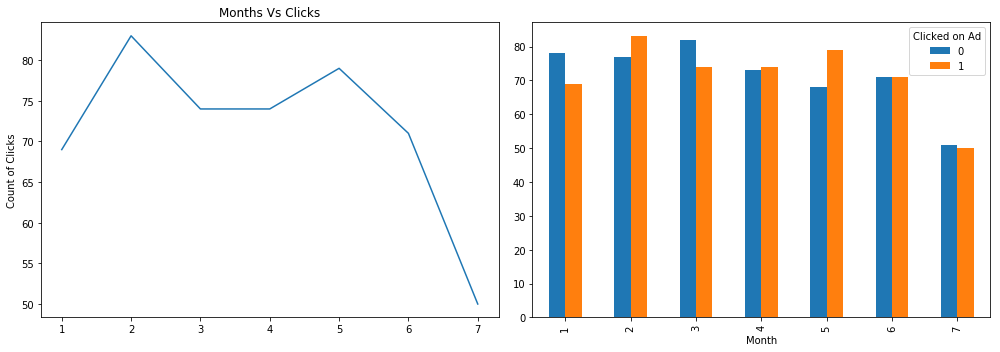

In [24]:
f,ax=plt.subplots(1,2,figsize=(14,5))
df['Month'][df['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Months Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(df["Clicked on Ad"], df["Month"]).T.plot(kind = 'Bar',ax=ax[1])
#df.groupby(['Month'])['Clicked on Ad'].sum() # alternative code
plt.tight_layout()
plt.show()

Line chart showing the count of clicks for each month. Grouped bar chart shows distribution of target variable across 7 months. 2nd Month seems to be the best for clicking on a Ad.

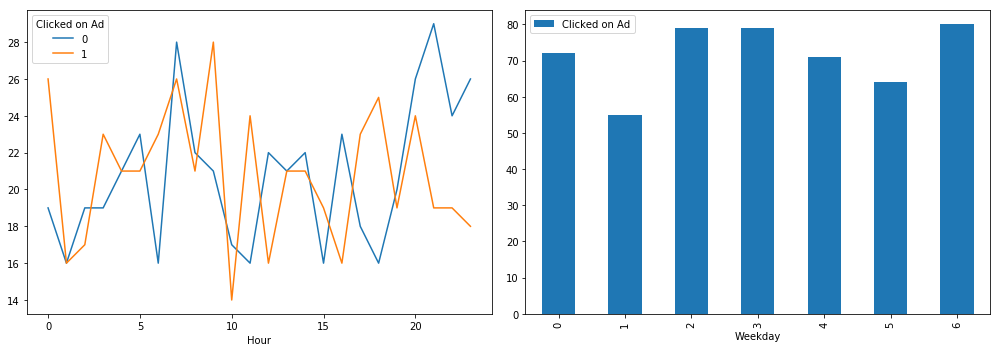

In [25]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(df["Clicked on Ad"], df["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(df, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'Bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

Line chart here indicates that user tends to click on a Ad later in a day or probably early in the morning. It is expected based on the age feature that most people are working so it seems appropriate as they either find time early or late in the day. Also sunday seems to be effective for clicking on a ad from the bar chart.

## Clicked Vs Not Clicked

In [26]:
df.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


Average profile of a user who will click on a ad or not.

In [27]:
df.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


Distribution of clicks by gender. It seems that more number of females have clicked on ad.

In [28]:
hdf = pd.pivot_table(df, index = ['Hour'], columns = ['Male'], values = ['Clicked on Ad'], 
                     aggfunc= np.sum).rename(columns = {'Clicked on Ad':'Clicked'})

cm = sns.light_palette("green", as_cmap=True)
hdf.style.background_gradient(cmap=cm)  # Sums all 1's i.e clicked for each hour

Distribution by each hour and by gender. Overall females tend to click on a Ad more often than males.

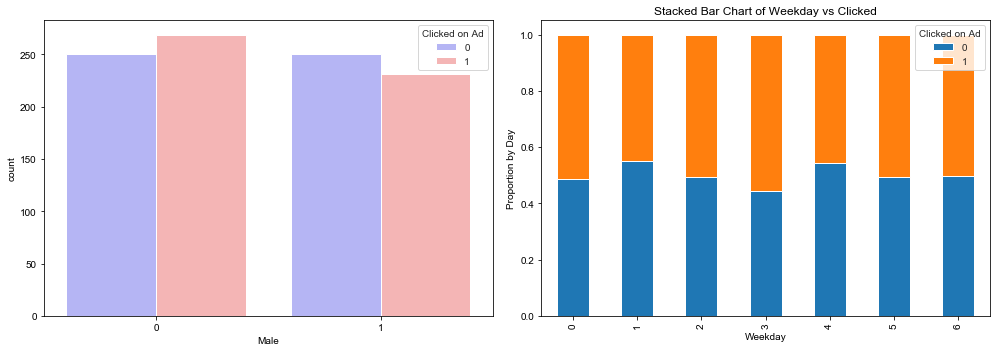

In [29]:
f,ax=plt.subplots(1,2,figsize=(14,5))
sns.set_style('whitegrid')
sns.countplot(x='Male',hue='Clicked on Ad',data=df,palette='bwr', ax = ax[0]) # Overall distribution of Males and females count
table = pd.crosstab(df['Weekday'],df['Clicked on Ad'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[1], grid = False) # 0 - Monday
ax[1].set_title('Stacked Bar Chart of Weekday vs Clicked')
ax[1].set_ylabel('Proportion by Day')
ax[1].set_xlabel('Weekday')
plt.tight_layout()
plt.show()

From the stacked bar chart it seems that there more chances of user clicking on a ad if its a thursday!

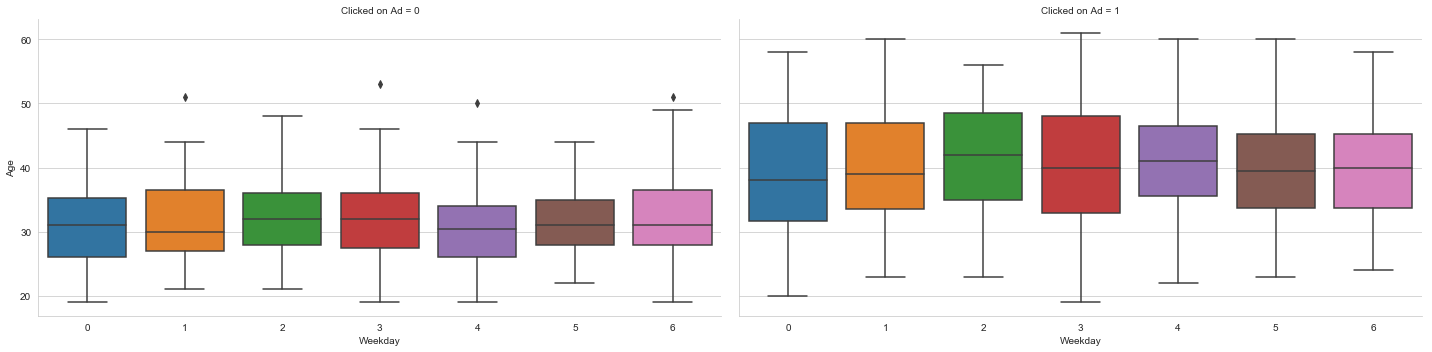

In [30]:
sns.factorplot(x="Weekday", y="Age", col="Clicked on Ad", data=df, kind="box",size=5, aspect=2.0) 

Comparison of users who have clicked on ad or not in terms of age and weekday. It is clear that people with higher age tend to click on a ad.

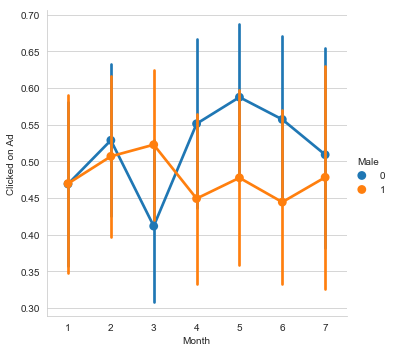

In [31]:
sns.factorplot('Month', 'Clicked on Ad', hue='Male', data = df)
plt.show()

# Identifying Potential Outliers using IQR

In [32]:
for i in numeric_cols:
    stat = df[i].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64
The upper and lower bounds for suspected outliers are 119.32875 and 10.57875.
count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64
The upper and lower bounds for suspected outliers are 61.5 and 9.5.
count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area Income, dtype: float64
The upper and lower bounds for suspected outliers are 93128.88375000001 and 19373.553749999992.
count    1000.000000
mean      180.000100
std        43.902339
min       104.780000
25%       138.830000
50%       183.130000
75%       218